In [ ]:
#Import Librarries

In [ ]:
import tensorflow as tf

In [ ]:
import numpy as np

import matplotlib.pyplot as plt


In [ ]:
print(tf.__version__)

2.4.1


In [ ]:
#Load tf MNIST Fashion Data set

In [ ]:
data= tf.keras.datasets.fashion_mnist

In [ ]:
(train_img, train_labels),(test_img, test_labels)=data.load_data()

In [ ]:
class_names= ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_img.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
test_img.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:

#Pre-process the data

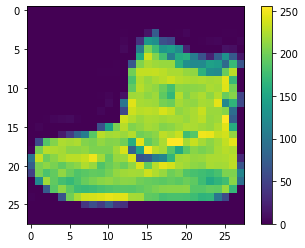

In [ ]:
plt.figure()
plt.imshow(train_img[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
#Scale the train & test image

train_img=train_img / 255.0

test_img=test_img / 255.0

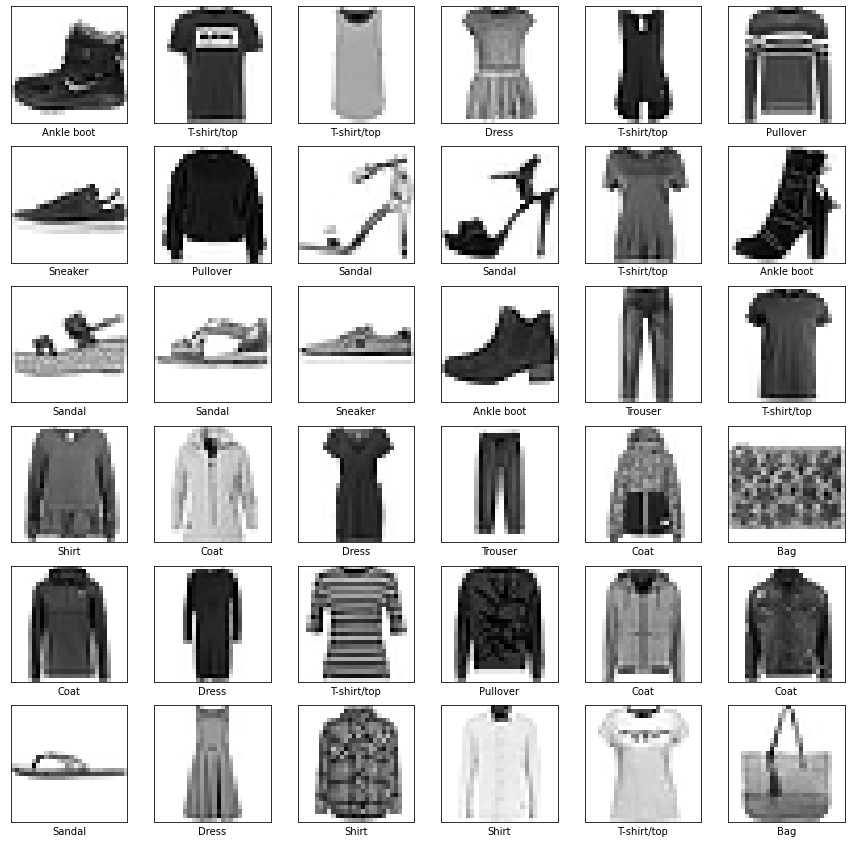

In [ ]:
plt.figure(figsize=(15,15))
for i in range(36):
  plt.subplot(6,6,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_img[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

plt.show()

In [ ]:
#Build the model

In [ ]:
model=tf.keras.Sequential([
                           tf.keras.layers.Flatten(input_shape=(28,28)),
                           tf.keras.layers.Dense(256, activation='relu'),
                           tf.keras.layers.Dense(10)
])

In [ ]:
#Compile the Model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
#Train the model

model.fit(train_img, train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6060 - accuracy: 0.7897
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3672 - accuracy: 0.8666
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3282 - accuracy: 0.8805
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2994 - accuracy: 0.8900
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2877 - accuracy: 0.8946
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2689 - accuracy: 0.9001
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2521 - accuracy: 0.9049
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2438 - accuracy: 0.9079
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2280 - accuracy: 0.9143
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.223

In [ ]:
test_loss, test_acc = model.evaluate(test_img,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3656 - accuracy: 0.8951

Test accuracy: 0.8950999975204468


In [ ]:
#Make predictions

In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_img)

In [ ]:
predictions[0]

array([3.3793572e-14, 5.2833703e-17, 2.9830470e-13, 5.2098966e-18,
       8.9217230e-19, 6.8335936e-07, 7.9094725e-15, 1.9048513e-05,
       3.2093708e-17, 9.9998021e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
test_labels[0]

9

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [ ]:
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

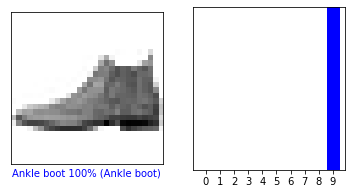

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_img)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

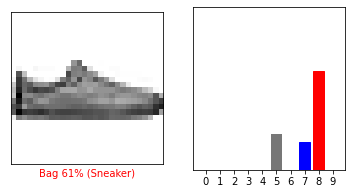

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_img)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()